In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
# Reloading the data from the CSV file
filtered_B_dataset = pd.read_csv('B.csv')

selected_columns = filtered_B_dataset.iloc[:, 5:27]

# Create a new Dataframe
B_Train = pd.DataFrame(selected_columns)
B_Train

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x7,y7,x8,y8,x9,y9,x10,y10,mean_spacing,speed
0,64.198200,-437.934000,120.480000,-371.070,63.786000,-341.568000,106.800000,-463.518000,95.801300,-304.605000,...,31.259300,-269.088000,129.833000,-226.134000,67.114600,-216.408000,64.3369,-598.204,4.029811,2.344122
1,72.320600,-405.058000,63.786000,-341.568,157.199000,-318.642000,95.801300,-304.605000,64.198200,-437.934000,...,31.259300,-269.088000,129.833000,-226.134000,67.114600,-216.408000,64.3369,-598.204,3.021100,2.318080
2,72.320600,-405.058000,106.800000,-463.518,120.480000,-371.070000,63.786000,-341.568000,95.801300,-304.605000,...,64.336900,-598.204000,31.259300,-269.088000,67.114600,-216.408000,129.8330,-226.134,1.940468,2.058227
3,67.114600,-216.408000,95.801300,-304.605,63.786000,-341.568000,129.833000,-226.134000,157.199000,-318.642000,...,72.320600,-405.058000,64.198200,-437.934000,106.800000,-463.518000,64.3369,-598.204,2.130530,1.733794
4,64.198200,-437.934000,72.320600,-405.058,120.480000,-371.070000,63.786000,-341.568000,64.336900,-598.204000,...,95.801300,-304.605000,31.259300,-269.088000,129.833000,-226.134000,67.1146,-216.408,1.510734,1.680034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251214,101.888882,-402.221455,106.231691,-437.653,105.885018,-436.688364,99.245336,-415.323091,109.418345,-402.513455,...,106.433755,-427.927273,110.271655,-402.981091,71.812473,-339.821364,146.4770,-422.143,1.525232,0.715022
251215,101.888882,-402.221455,106.231691,-437.653,105.885018,-436.688364,99.245336,-415.323091,109.418345,-402.513455,...,106.433755,-427.927273,110.271655,-402.981091,71.812473,-339.821364,146.4770,-422.143,1.608167,0.727408
251216,101.888882,-402.221455,106.231691,-437.653,105.885018,-436.688364,99.245336,-415.323091,109.418345,-402.513455,...,106.433755,-427.927273,110.271655,-402.981091,71.812473,-339.821364,146.4770,-422.143,1.644345,0.920967
251217,101.888882,-402.221455,106.231691,-437.653,105.885018,-436.688364,99.245336,-415.323091,109.418345,-402.513455,...,106.433755,-427.927273,110.271655,-402.981091,71.812473,-339.821364,146.4770,-422.143,2.512119,0.917597


In [3]:
# Reloading the data from the CSV file
filtered_R_dataset = pd.read_csv('R.csv')

selected_columns = filtered_R_dataset.iloc[:, 5:27]
# Create a new Dataframe
R_Train = pd.DataFrame(selected_columns)
R_Train

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x7,y7,x8,y8,x9,y9,x10,y10,mean_spacing,speed
0,106.66600,-519.392000,159.707000,-629.096000,260.717000,-694.491000,109.1410,-283.308000,35.777700,-305.752000,...,116.822000,74.112600,44.812400,62.660700,66.678200,171.700000,68.546900,312.876000,5.215062,0.011165
1,198.87400,-539.048000,159.707000,-629.096000,35.777700,-305.752000,260.7170,-694.491000,109.141000,-283.308000,...,44.812400,62.660700,116.822000,74.112600,66.678200,171.700000,68.546900,312.876000,4.452147,0.051829
2,109.14100,-283.308000,75.588200,-205.963000,106.666000,-519.392000,198.8740,-539.048000,159.707000,-629.096000,...,116.822000,74.112600,260.717000,-694.491000,66.678200,171.700000,68.546900,312.876000,3.422699,0.004188
3,35.77770,-305.752000,75.588200,-205.963000,106.666000,-519.392000,198.8740,-539.048000,159.707000,-629.096000,...,116.822000,74.112600,260.717000,-694.491000,66.678200,171.700000,68.546900,312.876000,3.650382,0.036034
4,109.14100,-283.308000,35.777700,-305.752000,44.812400,62.660700,116.8220,74.112600,106.666000,-519.392000,...,66.678200,171.700000,159.707000,-629.096000,68.546900,312.876000,260.717000,-694.491000,3.536568,0.021723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816773,88.49154,-11.964763,101.298553,-3.486759,99.697593,-27.406498,89.7081,-16.428417,71.036792,4.478785,...,106.472749,-9.624683,98.803029,5.486983,83.307333,-20.178988,101.211736,-15.527965,0.687845,1.019557
816774,88.49154,-11.964763,101.298553,-3.486759,99.697593,-27.406498,89.7081,-16.428417,71.036792,4.478785,...,106.472749,-9.624683,98.803029,5.486983,83.307333,-20.178988,101.211736,-15.527965,0.928373,1.020128
816775,88.49154,-11.964763,101.298553,-3.486759,99.697593,-27.406498,89.7081,-16.428417,71.036792,4.478785,...,106.472749,-9.624683,98.803029,5.486983,83.307333,-20.178988,101.211736,-15.527965,0.953176,0.986179
816776,88.49154,-11.964763,101.298553,-3.486759,99.697593,-27.406498,89.7081,-16.428417,71.036792,4.478785,...,106.472749,-9.624683,98.803029,5.486983,83.307333,-20.178988,101.211736,-15.527965,0.991861,1.080993


Training with Hidden Layers: 1
Fold: 1
Epoch [10/100], Train Loss: 627.3687
Epoch [20/100], Train Loss: 182.8126
Epoch [30/100], Train Loss: 5.8091
Epoch [40/100], Train Loss: 23.4250
Epoch [50/100], Train Loss: 13.8075
Epoch [60/100], Train Loss: 2.2554
Epoch [70/100], Train Loss: 2.3614
Epoch [80/100], Train Loss: 1.5126
Epoch [90/100], Train Loss: 0.9868
Epoch [100/100], Train Loss: 0.8337
Fold: 2
Epoch [10/100], Train Loss: 298.8398
Epoch [20/100], Train Loss: 114.2939
Epoch [30/100], Train Loss: 77.2357
Epoch [40/100], Train Loss: 20.7370
Epoch [50/100], Train Loss: 18.8889
Epoch [60/100], Train Loss: 11.0589
Epoch [70/100], Train Loss: 7.4141
Epoch [80/100], Train Loss: 5.3081
Epoch [90/100], Train Loss: 3.7665
Epoch [100/100], Train Loss: 2.7099
Fold: 3
Epoch [10/100], Train Loss: 18.0013
Epoch [20/100], Train Loss: 6.3894
Epoch [30/100], Train Loss: 3.0913
Epoch [40/100], Train Loss: 1.0966
Epoch [50/100], Train Loss: 0.6092
Epoch [60/100], Train Loss: 0.5159
Epoch [70/100], Tr

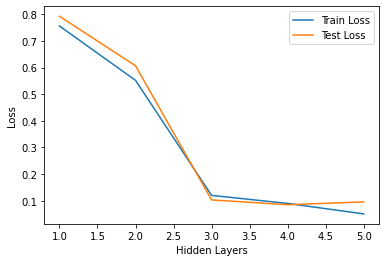

In [4]:
# create the hidden layer model
class SpeedPredictionModel(nn.Module):
    def __init__(self, hidden_layers):
        super(SpeedPredictionModel, self).__init__()
        self.hidden_layers = hidden_layers
        self.fc_in = nn.Linear(21, 32)  #
        self.hidden = nn.ModuleList()
        for _ in range(hidden_layers - 1):
            self.hidden.append(nn.Linear(32, 32))  # hidden_nodes = 32
        self.fc_out = nn.Linear(32, 1)  # output_dim = 1

    def forward(self, x):
        x = torch.relu(self.fc_in(x))
        for hidden_layer in self.hidden:
            x = torch.relu(hidden_layer(x))
        x = self.fc_out(x)
        return x

# train data
def create_train_data(df):
    # dataframe to numpy
    data = df.values
    inputs = data[:, :21]  # as input
    targets = data[:, 21]  # as output

    # turn into pytorch tensors
    inputs = torch.Tensor(inputs)
    targets = torch.Tensor(targets)

    return inputs, targets

# model and loss function
def create_model(hidden_layers):
    model = SpeedPredictionModel(hidden_layers)
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    return model, loss_function, optimizer

# train function
def train_model(inputs, targets, test_inputs, test_targets, model, optimizer, loss_function, num_epochs):
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Train Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

        # loss after each epoch
        test_outputs = model(test_inputs)
        test_loss = loss_function(test_outputs.squeeze(), test_targets)
        test_losses.append(test_loss.item())

    return train_losses[-1], test_losses[-1]  # return the last loss

# bootstrap
def create_bootstrap_dataset(inputs, targets, num_samples):
    indices = np.random.choice(len(inputs), size=num_samples, replace=True)
    bootstrap_inputs, bootstrap_targets = inputs[indices], targets[indices]
    return bootstrap_inputs, bootstrap_targets

# k fold vali
def create_cross_validation_datasets(inputs, targets, num_folds):
    kf = KFold(n_splits=num_folds, shuffle=True)
    train_datasets = []
    test_datasets = []
    for train_indices, test_indices in kf.split(inputs):
        train_inputs, train_targets = inputs[train_indices], targets[train_indices]
        test_inputs, test_targets = inputs[test_indices], targets[test_indices]
        train_datasets.append((train_inputs, train_targets))
        test_datasets.append((test_inputs, test_targets))
    return train_datasets, test_datasets

inputs, targets = create_train_data(B_Train)

# parameters
k_folds = 5
num_bootstrap_samples = 50
num_epochs = 100

# test on different hidden layers
hidden_layers_list = [1, 2, 3, 4, 5]

# get the loss
train_losses_final = []
test_losses_final = []

# start train
for hidden_layers in hidden_layers_list:
    print(f"Training with Hidden Layers: {hidden_layers}")

    train_losses = []
    test_losses = []

    train_datasets, test_datasets = create_cross_validation_datasets(inputs, targets, k_folds)

    # train on each fold
    for fold in range(k_folds):
        print(f"Fold: {fold+1}")

        train_inputs, train_targets = train_datasets[fold]
        test_inputs, test_targets = test_datasets[fold]

        model, loss_function, optimizer = create_model(hidden_layers)

        bootstrap_inputs, bootstrap_targets = create_bootstrap_dataset(train_inputs, train_targets, num_bootstrap_samples)

        bootstrap_inputs = torch.Tensor(bootstrap_inputs)
        bootstrap_targets = torch.Tensor(bootstrap_targets)
        test_inputs = torch.Tensor(test_inputs)
        test_targets = torch.Tensor(test_targets)

        train_loss, test_loss = train_model(bootstrap_inputs, bootstrap_targets, test_inputs, test_targets, model, optimizer, loss_function, num_epochs)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

    train_losses_final.append(train_losses[-1])
    test_losses_final.append(test_losses[-1])


# plot the loss
plt.plot(hidden_layers_list, train_losses_final, label='Train Loss')
plt.plot(hidden_layers_list, test_losses_final, label='Test Loss')
plt.xlabel('Hidden Layers')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training with Hidden Nodes: [5, 10, 20]
Fold: 1
Epoch [10/100], Train Loss: 0.3345
Epoch [20/100], Train Loss: 0.6016
Epoch [30/100], Train Loss: 0.3950
Epoch [40/100], Train Loss: 0.2118
Epoch [50/100], Train Loss: 0.1970
Epoch [60/100], Train Loss: 0.1900
Epoch [70/100], Train Loss: 0.1857
Epoch [80/100], Train Loss: 0.1857
Epoch [90/100], Train Loss: 0.1848
Epoch [100/100], Train Loss: 0.1849
Fold: 2
Epoch [10/100], Train Loss: 1.4423
Epoch [20/100], Train Loss: 0.5987
Epoch [30/100], Train Loss: 0.4749
Epoch [40/100], Train Loss: 0.3972
Epoch [50/100], Train Loss: 0.3197
Epoch [60/100], Train Loss: 0.1879
Epoch [70/100], Train Loss: 0.0905
Epoch [80/100], Train Loss: 0.1028
Epoch [90/100], Train Loss: 0.0897
Epoch [100/100], Train Loss: 0.0914
Fold: 3
Epoch [10/100], Train Loss: 0.7122
Epoch [20/100], Train Loss: 0.4051
Epoch [30/100], Train Loss: 0.2664
Epoch [40/100], Train Loss: 0.1370
Epoch [50/100], Train Loss: 0.1322
Epoch [60/100], Train Loss: 0.1217
Epoch [70/100], Train Lo

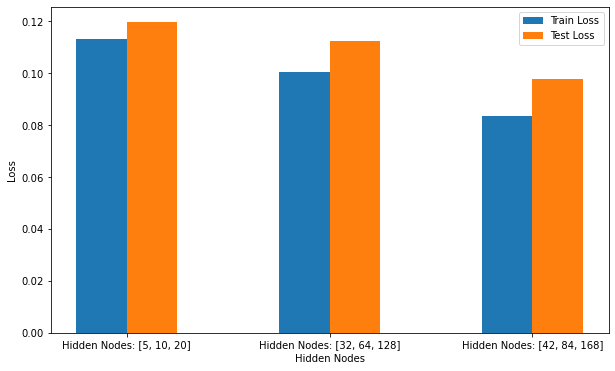

In [5]:
# create the hidden node model
class SpeedPredictionModel(nn.Module):
    def __init__(self, hidden_nodes):
        super(SpeedPredictionModel, self).__init__()
        self.fc1 = nn.Linear(21, hidden_nodes[0])
        self.hidden = nn.ModuleList()
        for i in range(len(hidden_nodes) - 1):
            self.hidden.append(nn.Linear(hidden_nodes[i], hidden_nodes[i+1]))
        self.fc_out = nn.Linear(hidden_nodes[-1], 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        for hidden_layer in self.hidden:
            x = torch.relu(hidden_layer(x))
        x = self.fc_out(x)
        return x

inputs, targets = create_train_data(B_Train)

# parameter
k_folds = 5
num_bootstrap_samples = 50
num_epochs = 100

# list of different sets of nodes
hidden_nodes_list = [[5, 10, 20], [32, 64, 128], [42, 84, 168]]

# get the loss
train_losses_final = []
test_losses_final = []

# start train
for hidden_nodes in hidden_nodes_list:
    print(f"Training with Hidden Nodes: {hidden_nodes}")

    train_losses = []
    test_losses = []

    train_datasets, test_datasets = create_cross_validation_datasets(inputs, targets, k_folds)

    # train on each fold
    for fold in range(k_folds):
        print(f"Fold: {fold+1}")

        train_inputs, train_targets = train_datasets[fold]
        test_inputs, test_targets = test_datasets[fold]

        model, loss_function, optimizer = create_model(hidden_nodes)

        bootstrap_inputs, bootstrap_targets = create_bootstrap_dataset(train_inputs, train_targets, num_bootstrap_samples)

        bootstrap_inputs = torch.Tensor(bootstrap_inputs)
        bootstrap_targets = torch.Tensor(bootstrap_targets)
        test_inputs = torch.Tensor(test_inputs)
        test_targets = torch.Tensor(test_targets)

        train_loss, test_loss = train_model(bootstrap_inputs, bootstrap_targets, test_inputs, test_targets, model, optimizer, loss_function, num_epochs)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

    train_losses_final.append(train_losses[-1])
    test_losses_final.append(test_losses[-1])


# plot the loss
plt.figure(figsize=(10, 6))
labels = ['Hidden Nodes: [5, 10, 20]', 'Hidden Nodes: [32, 64, 128]', 'Hidden Nodes: [42, 84, 168]']
x = np.arange(len(labels))
width = 0.25
plt.bar(x - width/2, train_losses_final, width, label='Train Loss')
plt.bar(x + width/2, test_losses_final, width, label='Test Loss')
plt.xlabel('Hidden Nodes')
plt.ylabel('Loss')
plt.xticks(x, labels)
plt.legend()
plt.show()


In [6]:
# create the fixed model
class SpeedPredictionModel(nn.Module):
    def __init__(self, hidden_nodes):
        super(SpeedPredictionModel, self).__init__()
        self.fc_in = nn.Linear(21, hidden_nodes[0])
        self.hidden = nn.ModuleList()
        for i in range(len(hidden_nodes) - 1):
            self.hidden.append(nn.Linear(hidden_nodes[i], hidden_nodes[i+1]))
        self.fc_out = nn.Linear(hidden_nodes[-1], 1)

    def forward(self, x):
        x = torch.relu(self.fc_in(x))
        for hidden_layer in self.hidden:
            x = torch.relu(hidden_layer(x))
        x = self.fc_out(x)
        return x

# hidden_nodes setting
hidden_nodes = [32, 64, 128]

model, loss_function, optimizer = create_model(hidden_nodes)

num_epochs = 100

# train data processing
df1 = B_Train.drop(B_Train.index[-1])# Bottleneck data as trainset 1
df2 = R_Train  # # Ring data as trainset 2

# size tuning
df2 = df2.sample(len(df1), replace=False)
df1_half = df1.sample(frac=0.5, replace=False)
df2_half = df2.sample(frac=0.5, replace=False)

# get the loss
train_losses = []
test_losses = []



Data Combination: B/B
Epoch [10/100], Train Loss: 0.0883
Epoch [20/100], Train Loss: 0.0952
Epoch [30/100], Train Loss: 0.0880
Epoch [40/100], Train Loss: 0.0847
Epoch [50/100], Train Loss: 0.0842
Epoch [60/100], Train Loss: 0.0842
Epoch [70/100], Train Loss: 0.0841
Epoch [80/100], Train Loss: 0.0841
Epoch [90/100], Train Loss: 0.0841
Epoch [100/100], Train Loss: 0.0841
Final Train Loss: 0.0841, Final Test Loss: 0.0841
Data Combination: B/R
Epoch [10/100], Train Loss: 0.1166
Epoch [20/100], Train Loss: 0.1185
Epoch [30/100], Train Loss: 0.1168
Epoch [40/100], Train Loss: 0.1156
Epoch [50/100], Train Loss: 0.1152
Epoch [60/100], Train Loss: 0.1151
Epoch [70/100], Train Loss: 0.1151
Epoch [80/100], Train Loss: 0.1151
Epoch [90/100], Train Loss: 0.1151
Epoch [100/100], Train Loss: 0.1151
Final Train Loss: 0.1151, Final Test Loss: 0.1002
Data Combination: R/B
Epoch [10/100], Train Loss: 0.1286
Epoch [20/100], Train Loss: 0.1216
Epoch [30/100], Train Loss: 0.1195
Epoch [40/100], Train Loss:

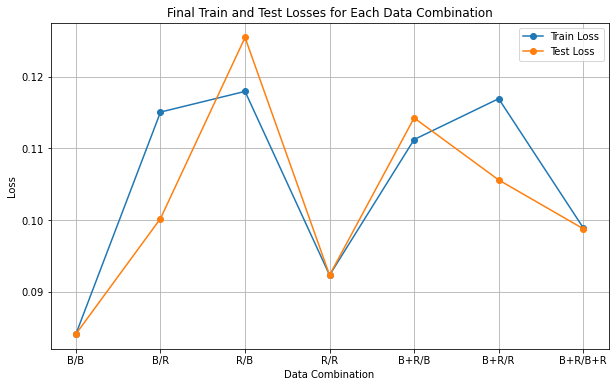

In [11]:
# dataset combination
train_inputs_1, train_targets_1 = create_train_data(df1)
test_inputs_1, test_targets_1 = create_train_data(df1)

train_inputs_2, train_targets_2 = create_train_data(df2)
test_inputs_2, test_targets_2 = create_train_data(df2)

train_inputs_combined, train_targets_combined = create_train_data(pd.concat([df1_half, df2_half]))
test_inputs_combined, test_targets_combined = create_train_data(pd.concat([df1_half, df2_half]))

train_datasets = [(train_inputs_1, train_targets_1), (train_inputs_1, train_targets_2),
                  (train_inputs_2, train_targets_1), (train_inputs_2, train_targets_2),
                  (train_inputs_combined, train_targets_1), (train_inputs_combined, train_targets_2),
                  (train_inputs_combined, train_targets_combined)]

test_datasets = [(test_inputs_1, test_targets_1), (test_inputs_2, test_targets_2),
                 (test_inputs_1, test_targets_1), (test_inputs_2, test_targets_2),
                 (test_inputs_1, test_targets_1), (test_inputs_2, test_targets_2),
                 (test_inputs_combined, test_targets_combined)]

# start train
train_losses_final = []
test_losses_final = []
data_labels = ['B/B', 'B/R', 'R/B', 'R/R', 'B+R/B', 'B+R/R', 'B+R/B+R']

for i in range(len(train_datasets)):
    print(f"Data Combination: {data_labels[i]}")

    train_inputs, train_targets = train_datasets[i]
    test_inputs, test_targets = test_datasets[i]

    train_loss, test_loss = train_model(train_inputs, train_targets, test_inputs, test_targets, model, optimizer, loss_function, num_epochs)

    train_losses_final.append(train_loss)
    test_losses_final.append(test_loss)

    # Print the final train and test loss for the current data combination
    print(f"Final Train Loss: {train_loss:.4f}, Final Test Loss: {test_loss:.4f}")

# Plotting the final train and test losses for each data combination
plt.figure(figsize=(10, 6))
plt.plot(data_labels, train_losses_final, label='Train Loss', marker='o')
plt.plot(data_labels, test_losses_final, label='Test Loss', marker='o')
plt.xlabel('Data Combination')
plt.ylabel('Loss')
plt.title('Final Train and Test Losses for Each Data Combination')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
train_losses_final

[0.08409611135721207,
 0.11505507677793503,
 0.11794154345989227,
 0.09230487048625946,
 0.11122428625822067,
 0.11692414432764053,
 0.0989169329404831]

In [13]:
test_losses_final

[0.08409521728754044,
 0.10019825398921967,
 0.12546668946743011,
 0.0923161432147026,
 0.11423852294683456,
 0.10558516532182693,
 0.09878092259168625]